<a href="https://colab.research.google.com/github/ctkerns/cap4630_spring2020/blob/master/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

##Problem 1

In [0]:
_w = 10
_mu = 4

def get_random_data(w, b, mu, sigma, m):
    data = []
    labels = []

    for i in range(m):
        # c chosen with equal probability of 0 and 1
        c = np.floor(np.random.rand()*2)
        labels.append(c)

        # choose n as noise with mean mu and standard deviation sigma
        n = np.random.normal(mu, sigma)

        # calculate data x_1 and x_2
        x_1 = np.random.rand()
        x_2 = w*x_1 + b + (-1)**c*n
        data.append([x_1, x_2])

    return data, labels

def display_random_data(data, labels):
    for i, point in enumerate(data):
        if labels[i] == 0:
            plt.scatter(point[0], point[1], color='blue')
        elif labels[i] == 1:
            plt.scatter(point[0], point[1], color='red')

# generate separate sets of training and testing data
training = get_random_data(_w, 0, _mu, 1, 160)
test = get_random_data(_w, 0, _mu, 1, 40)

##Problem 2

In [238]:
# create the network
network = tf.keras.models.Sequential()

output_layer = tf.keras.layers.Dense(units=1, activation='relu')
network.add(output_layer)

network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# train the network
history = network.fit(training[0], training[1], epochs=500, batch_size=8)

Epoch 1/500
20/20 [==============================] - 0s 1ms/step - loss: 4.4439 - accuracy: 0.7063
Epoch 2/500
20/20 [==============================] - 0s 998us/step - loss: 4.3751 - accuracy: 0.7125
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 4.3725 - accuracy: 0.7125
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 4.3708 - accuracy: 0.7125
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 4.3692 - accuracy: 0.7125
Epoch 6/500
20/20 [==============================] - 0s 1ms/step - loss: 4.3677 - accuracy: 0.7125
Epoch 7/500
20/20 [==============================] - 0s 1ms/step - loss: 4.3665 - accuracy: 0.7125
Epoch 8/500
20/20 [==============================] - 0s 997us/step - loss: 4.3654 - accuracy: 0.7125
Epoch 9/500
20/20 [==============================] - 0s 1ms/step - loss: 4.3645 - accuracy: 0.7125
Epoch 10/500
20/20 [==============================] - 0s 1ms/step - loss: 4.3635 - accuracy: 0.7125
Epoch

###Scatterplot
Black line is the separating line used to genarate the weights  
Green line is the seperating line derived from the trained weights

The slope of the line is found by taking the absolute value of the ratio of the two input weights.

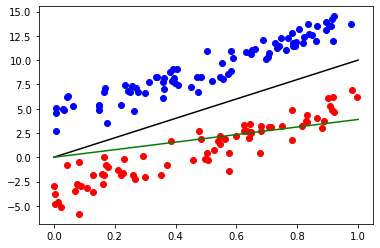

In [240]:
# display the separating lines
display_random_data(training[0], training[1])
plt.plot([0, 1], [0, _w], color='black')

model_weight = output_layer.get_weights()
slope = np.abs(model_weight[0][0]/model_weight[0][1])
plt.plot([0, 1], [0, slope], color='green')